# AirNow and WRF-Chem Regulatory Calculations

This example will compare WRF-Chem model results against AirNow surface observations for the
MDA8 ozone and 24 hour average PM{subscript}`2.5` regulatory metrics.

```{note}
Check out the {doc}`/users_guide/supported_diagnostics` for information on how MELODIES MONET calculates these regulatory metrics
```

All default surface plots are available for the regulatory calculations except for the ``spatial_overlay`` and ``scorecard`` plots. There is also an additional plot called the ``spatial_bias_exceedance`` plot available that is a difference plot of model - observations for the number of exceedances greater than the regulatory standard within the analysis window with options to specify the domain. 

```{note}
Check out the {doc}`/users_guide/supported_plots` for more description of these plots.
```

This example shows how one can compare results from two different model simulations against observations. This particular example compares WRF-Chem results using two different chemical mechanisms (RACM_ESRL and RACM_ESRL_VCP). Simulated surface ozone is slightly improved in WRF-Chem using the RACM_ESRL_VCP mechanism as compared to the AirNow observations. 

First, we import the {mod}`melodies_monet.driver` module.

In [1]:
from melodies_monet import driver

## Analysis driver class

Now, lets create an instance of the analysis driver class, {class}`melodies_monet.driver.analysis`.
It consists of these main parts:
* model instances
* observation instances
* a paired instance of both

In [2]:
an = driver.analysis()

Initially, most of our {class}`~melodies_monet.driver.analysis` object's attributes
are set to ``None``, though some have meaningful defaults:

In [3]:
an

analysis(
    control='control.yaml',
    control_dict=None,
    models={},
    obs={},
    paired={},
    start_time=None,
    end_time=None,
    time_intervals=None,
    download_maps=True,
    output_dir=None,
    output_dir_save=None,
    output_dir_read=None,
    debug=False,
    save=None,
    read=None,
    regrid=False,
)

## Control file

We set the YAML control file and begin by reading the file. As shown below in order to calculate regulatory metrics set ``regulatory`` equal to ``True`` under each relevant observation. Currently, regulatory calculations are only available for ozone and PM{subscript}`2.5`.

```{note}
Check out the {doc}`/appendix/yaml` for info on how to create
and modify these files.
```

In [4]:
an.control = "control_wrfchem_mech-0905_2_reg.yaml"
an.read_control()
an.control_dict

{'analysis': {'start_time': '2019-09-04-06:00:00',
  'end_time': '2019-09-06-05:00:00',
  'output_dir': './output/airnow_wrfchem_reg',
  'debug': True},
 'model': {'RACM_ESRL': {'files': 'example:wrfchem:racm_esrl_reg',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp', 'surf_only_nc': True},
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
   'projection': None,
   'plot_kwargs': {'color': 'magenta', 'marker': 's', 'linestyle': '-'}},
  'RACM_ESRL_VCP': {'files': 'example:wrfchem:racm_esrl_vcp_reg',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp', 'surf_only_nc': True},
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
   'projection': None,
   'plot_kwargs': {'color': 'gold', 'marker': 'o', 'linestyle': '-'}}},
 'obs': {'airnow': {'use_airnow': True,
   'filename': 'example:airnow:2019-09',
   'obs_type': 'pt_sfc',
   'variables': {'OZONE': {'unit_sca

````{admonition} Note: This is the complete file that was loaded.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
```
````

Now, some of our {class}`~melodies_monet.driver.analysis` object's attributes are populated:

In [5]:
an

analysis(
    control='control_wrfchem_mech-0905_2_reg.yaml',
    control_dict=...,
    models={},
    obs={},
    paired={},
    start_time=Timestamp('2019-09-04 06:00:00'),
    end_time=Timestamp('2019-09-06 05:00:00'),
    time_intervals=None,
    download_maps=True,
    output_dir='./output/airnow_wrfchem_reg',
    output_dir_save='./output/airnow_wrfchem_reg',
    output_dir_read='./output/airnow_wrfchem_reg',
    debug=True,
    save=None,
    read=None,
    regrid=False,
)

## Load the model data

The driver will automatically loop through the "models" found in the `model` section
of the YAML file and create an instance of {class}`melodies_monet.driver.model` for each
that includes the
* label
* mapping information
* file names (can be expressed using a glob expression)
* xarray object

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 24-56
```
````

In [6]:
an.open_models()

wrfchem
example:wrfchem:racm_esrl_reg
**** Reading WRF-Chem model output...
wrfchem
example:wrfchem:racm_esrl_vcp_reg
**** Reading WRF-Chem model output...


Applying {meth}`~melodies_monet.driver.analysis.open_models`
populates the {attr}`~melodies_monet.driver.analysis.models` attribute.

In [7]:
an.models

{'RACM_ESRL': model(
     model='wrfchem',
     is_global=False,
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'surf_only_nc': True, 'var_list': ['PM2_5_DRY', 'o3']},
     file_str='example:wrfchem:racm_esrl_reg',
     label='RACM_ESRL',
     obj=...,
     mapping={'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
     variable_dict=None,
     label='RACM_ESRL',
     ...
 ),
 'RACM_ESRL_VCP': model(
     model='wrfchem',
     is_global=False,
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'surf_only_nc': True, 'var_list': ['PM2_5_DRY', 'o3']},
     file_str='example:wrfchem:racm_esrl_vcp_reg',
     label='RACM_ESRL_VCP',
     obj=...,
     mapping={'airnow': {'PM2_5_DRY': 'PM2.5', 'o3': 'OZONE'}},
     variable_dict=None,
     label='RACM_ESRL_VCP',
     ...
 )}

We can access the underlying dataset with the
{attr}`~melodies_monet.driver.model.obj` attribute.

In [8]:
an.models['RACM_ESRL'].obj

<xarray.Dataset> Size: 49MB
Dimensions:    (y: 284, x: 440, time: 48, z: 1)
Coordinates:
    longitude  (y, x) float32 500kB -122.3 -122.2 -122.1 ... -60.52 -60.37
    latitude   (y, x) float32 500kB 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time       (time) datetime64[ns] 384B 2019-09-04T06:00:00 ... 2019-09-06T...
Dimensions without coordinates: y, x, z
Data variables:
    PM2_5_DRY  (time, z, y, x) float32 24MB 1.916 1.911 1.895 ... 0.4702 0.4709
    o3         (time, z, y, x) float32 24MB 32.62 32.62 32.6 ... 37.28 37.56
Attributes: (12/15)
    FieldType:                 104
    MemoryOrder:               XYZ
    description:               pm2.5 aerosol dry mass
    units:                     ug m^-3
    stagger:                   
    coordinates:               XLONG XLAT XTIME
    ...                        ...
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

## Load the observational data

As with the model data, the driver will loop through the "observations" found in
the `obs` section of the YAML file and create an instance of
{class}`melodies_monet.driver.observation` for each.

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 58-99
```
````

In [9]:
an.open_obs()

In [10]:
an.obs

{'airnow': observation(
     obs='airnow',
     label='airnow',
     file='example:airnow:2019-09',
     obj=...,
     type='pt_src',
     sat_type=None,
     data_proc=None,
     variable_dict={'OZONE': {'unit_scale': 1, 'unit_scale_method': '*', 'nan_value': -1.0, 'ylabel_plot': 'Ozone (ppbv)', 'vmin_plot': 15.0, 'vmax_plot': 55.0, 'vdiff_plot': 20.0, 'nlevels_plot': 21, 'regulatory': True, 'ylabel_reg_plot': 'MDA8 O3 (ppbv)', 'vmin_reg_plot': 30.0, 'vmax_reg_plot': 70.0, 'vdiff_reg_plot': 20.0}, 'PM2.5': {'unit_scale': 1, 'unit_scale_method': '*', 'nan_value': -1.0, 'ylabel_plot': 'PM2.5 (ug/m3)', 'ty_scale': 2.0, 'vmin_plot': 0.0, 'vmax_plot': 22.0, 'vdiff_plot': 15.0, 'nlevels_plot': 23, 'regulatory': True, 'ylabel_reg_plot': 'PM2.5_24hr (ug/m3)', 'vmin_reg_plot': 0.0, 'vmax_reg_plot': 22.0, 'vdiff_reg_plot': 15.0}},
     resample=None,
     time_var=None,
     regrid_method=None,
 )}

In [11]:
an.obs['airnow'].obj

<xarray.Dataset> Size: 1GB
Dimensions:     (x: 3786, time: 2091, y: 1)
Coordinates:
  * x           (x) int64 30kB 0 1 2 3 4 5 6 ... 3780 3781 3782 3783 3784 3785
  * time        (time) datetime64[ns] 17kB 2019-09-01 ... 2019-09-30T00:30:00
    latitude    (y, x) float64 30kB ...
    longitude   (y, x) float64 30kB ...
    siteid      (y, x) <U12 182kB ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 63MB ...
    BC          (time, y, x) float64 63MB ...
    CO          (time, y, x) float64 63MB ...
    NO          (time, y, x) float64 63MB ...
    NO2         (time, y, x) float64 63MB ...
    NO2Y        (time, y, x) float64 63MB ...
    ...          ...
    cmsa_name   (y, x) float64 30kB ...
    msa_code    (y, x) float64 30kB ...
    msa_name    (y, x) <U52 787kB ...
    state_name  (y, x) <U2 30kB ...
    epa_region  (y, x) <U5 76kB ...
    time_local  (time, y, x) datetime64[ns] 63MB ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

## Pair model and observational data

Now, we create a {class}`melodies_monet.driver.pair` for each model--obs pair
using the {meth}`~melodies_monet.driver.analysis.pair_data` routine.

In [12]:
%%time

an.pair_data()

1, in pair data
After pairing:                         time  BARPR   BC   CO   NO  NO2  NO2Y  NOX  NOY  OZONE  \
0       2019-09-01 00:00:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0   25.0   
1       2019-09-01 00:15:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    NaN   
2       2019-09-01 00:30:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    NaN   
3       2019-09-01 01:00:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0   24.0   
4       2019-09-01 01:15:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    NaN   
...                     ...    ...  ...  ...  ...  ...   ...  ...  ...    ...   
7916521 2019-09-29 23:15:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    NaN   
7916522 2019-09-29 23:30:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    NaN   
7916523 2019-09-30 00:00:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    8.0   
7916524 2019-09-30 00:15:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    NaN   
7916525 2019-09-30 00:30:00   -1.0 -1.0 -1.0 -1.0 -1.0  -1.0 -1.0 -1.0    NaN

In [13]:
an.paired

{'airnow_RACM_ESRL': pair(
     type='pt_sfc',
     radius_of_influence=1000000.0,
     obs='airnow',
     model='RACM_ESRL',
     model_vars=['PM2_5_DRY', 'o3'],
     obs_vars=['PM2.5', 'OZONE'],
     filename='airnow_RACM_ESRL.nc',
 ),
 'airnow_RACM_ESRL_VCP': pair(
     type='pt_sfc',
     radius_of_influence=1000000.0,
     obs='airnow',
     model='RACM_ESRL_VCP',
     model_vars=['PM2_5_DRY', 'o3'],
     obs_vars=['PM2.5', 'OZONE'],
     filename='airnow_RACM_ESRL_VCP.nc',
 )}

In [14]:
an.paired['airnow_RACM_ESRL']

pair(
    type='pt_sfc',
    radius_of_influence=1000000.0,
    obs='airnow',
    model='RACM_ESRL',
    model_vars=['PM2_5_DRY', 'o3'],
    obs_vars=['PM2.5', 'OZONE'],
    filename='airnow_RACM_ESRL.nc',
)

## Plot

The {meth}`~melodies_monet.driver.analysis.plotting` routine produces plots.

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 101-240
```
````

Reference std: 5.212232181881147
Reference std: 16.224367920262775
0 (1488, 1)
0 (1488, 2)
1 (1488, 3)
final 1 1


/Users/rschwantes/Documents/MONET/final_version1/apr_3/MELODIES-MONET/melodies_monet/plots/surfplots.py:1717: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


0 (267, 1)
0 (267, 2)
1 (267, 3)
final 1 1


/Users/rschwantes/Documents/MONET/final_version1/apr_3/MELODIES-MONET/melodies_monet/plots/surfplots.py:1717: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


0 (1889, 1)
0 (1889, 2)
1 (1889, 3)
final 1 1


/Users/rschwantes/Documents/MONET/final_version1/apr_3/MELODIES-MONET/melodies_monet/plots/surfplots.py:1717: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


0 (400, 1)
0 (400, 2)
1 (400, 3)
final 1 1


/Users/rschwantes/Documents/MONET/final_version1/apr_3/MELODIES-MONET/melodies_monet/plots/surfplots.py:1717: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


CPU times: user 4min 36s, sys: 1min 12s, total: 5min 48s
Wall time: 6min 1s


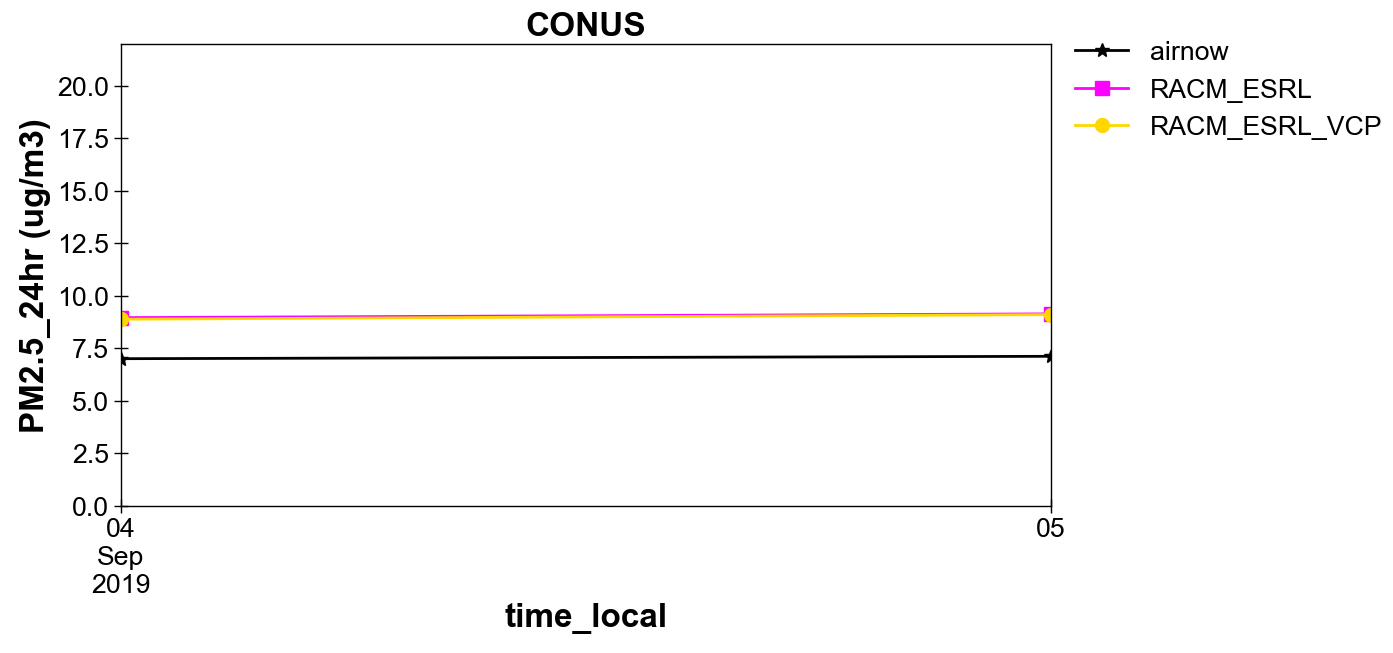

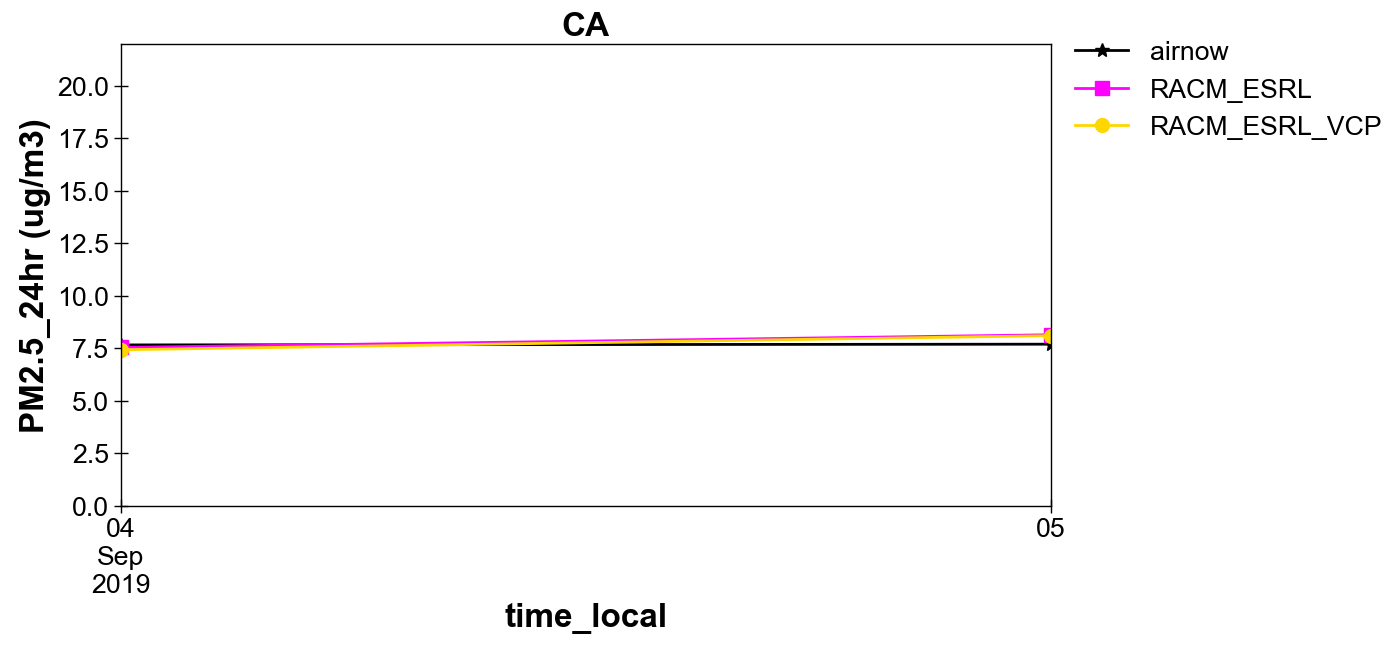

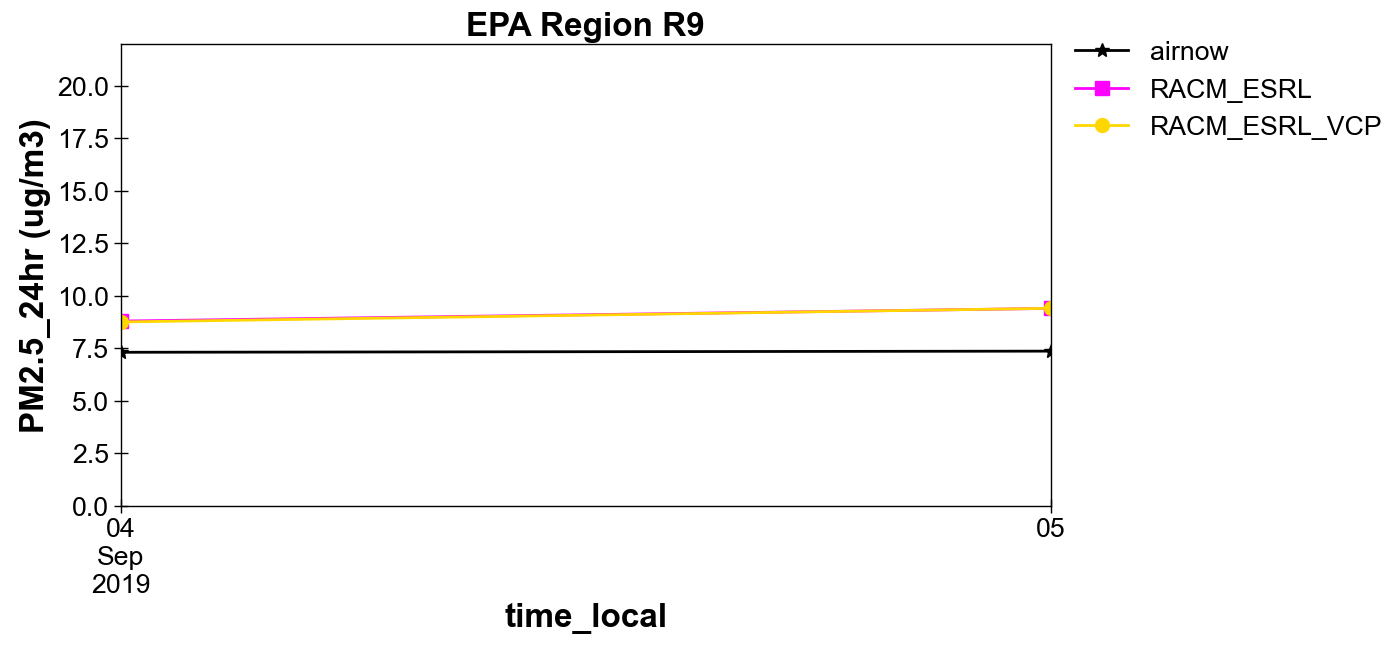

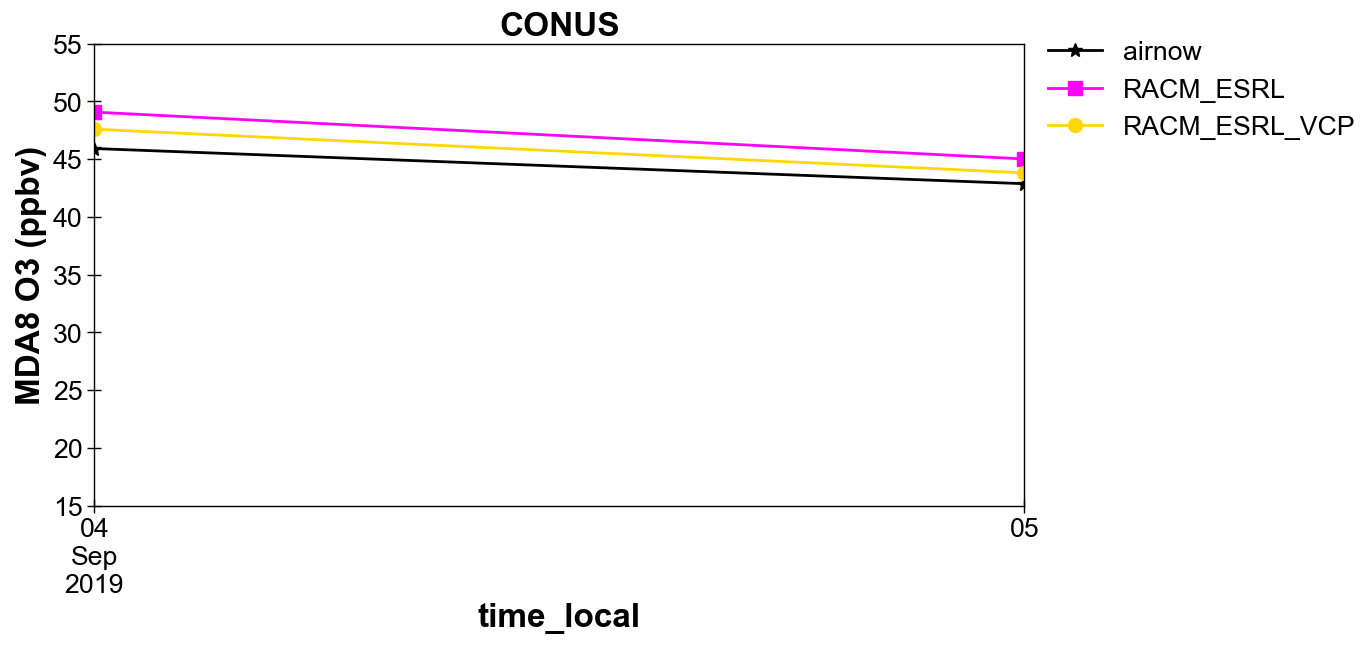

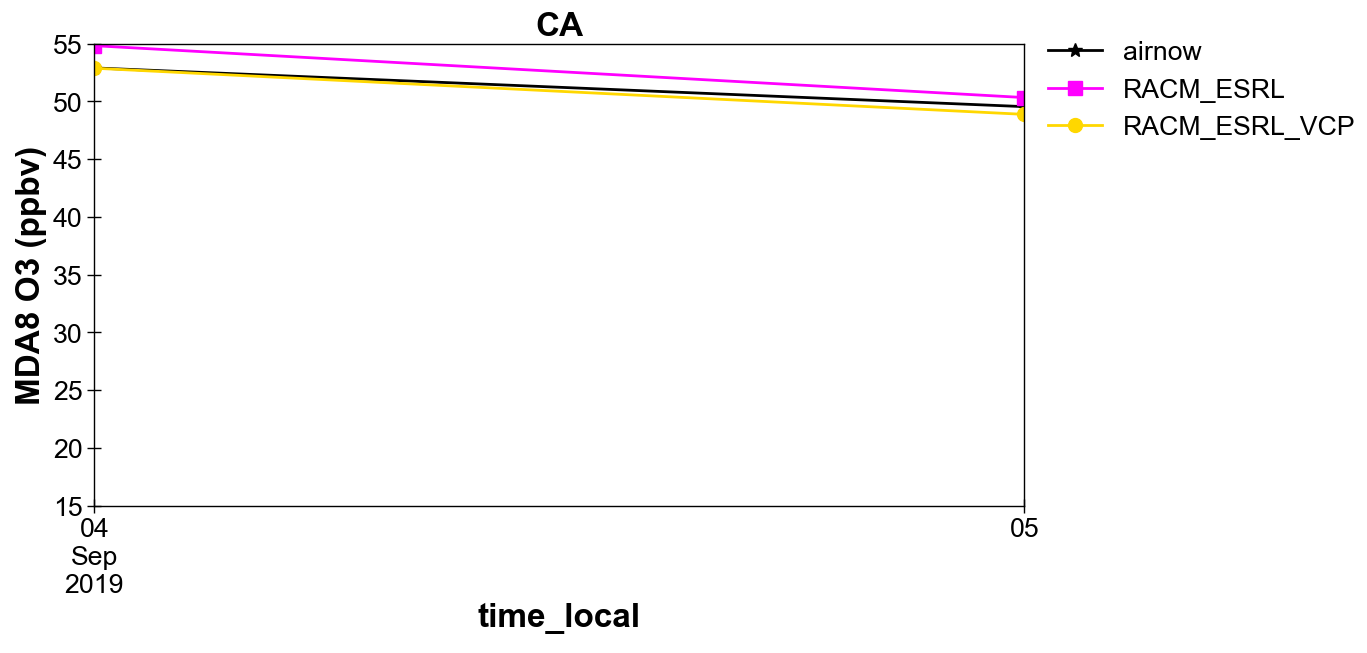

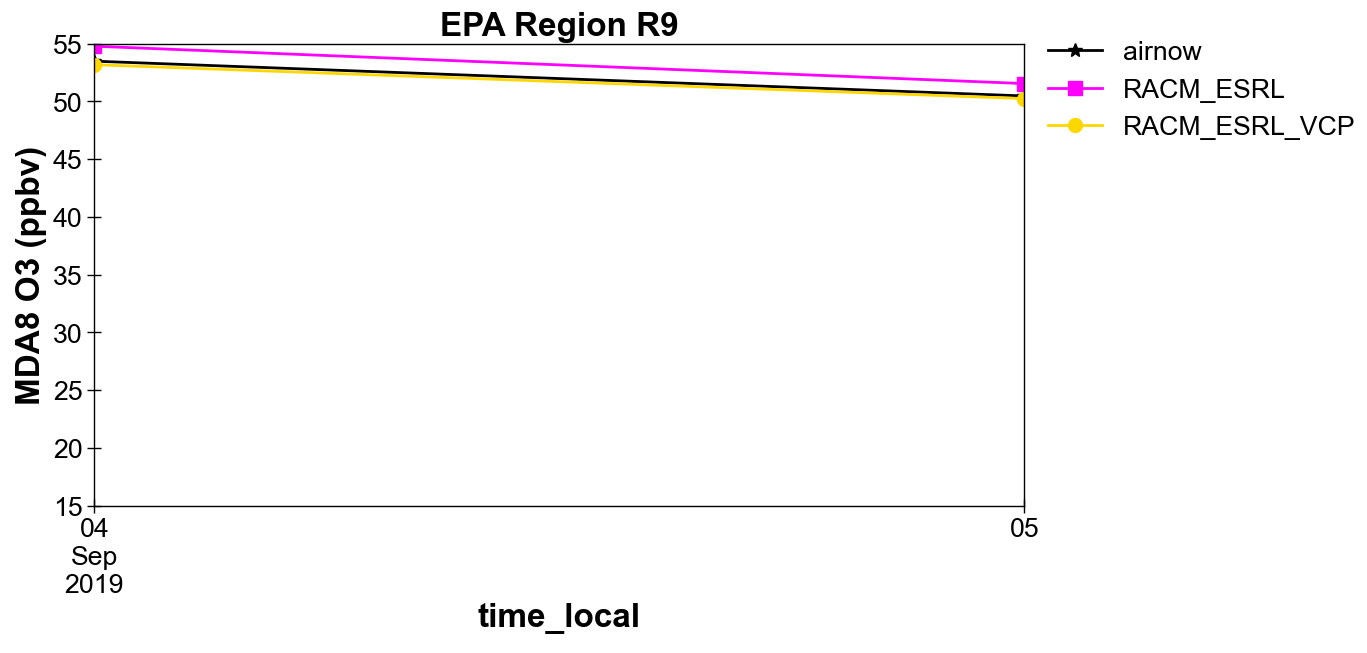

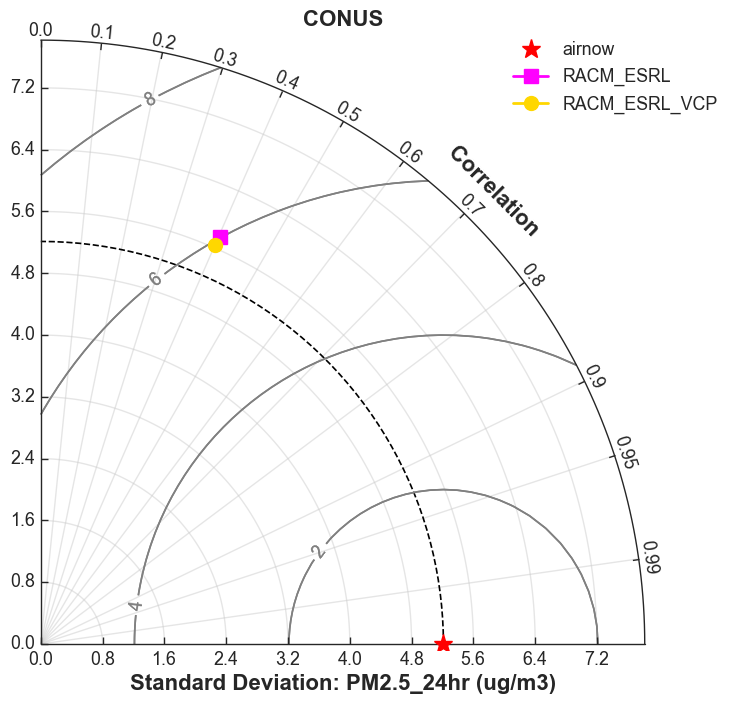

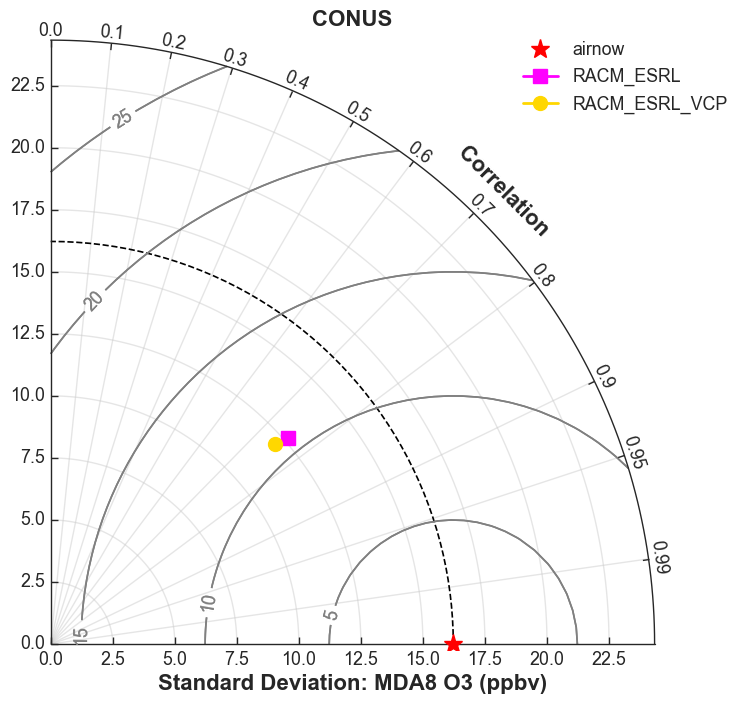

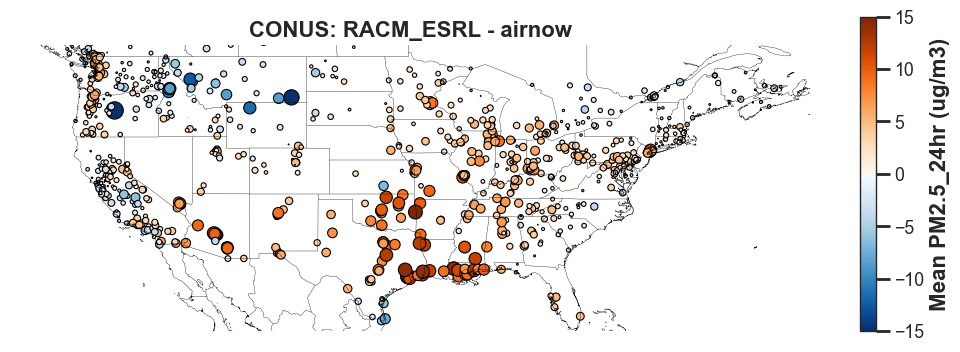

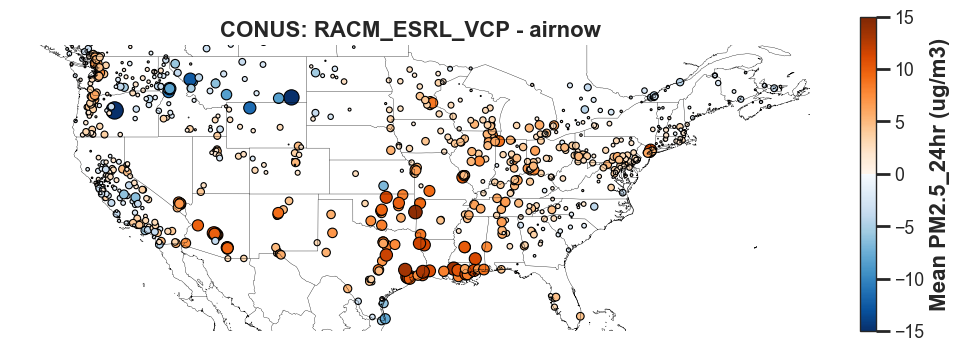

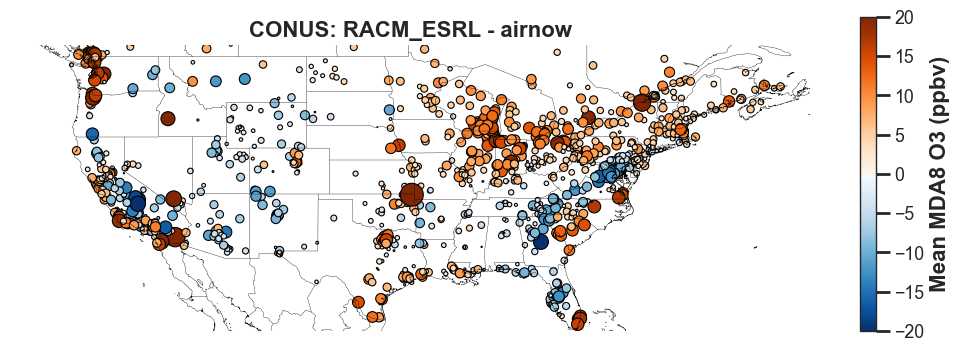

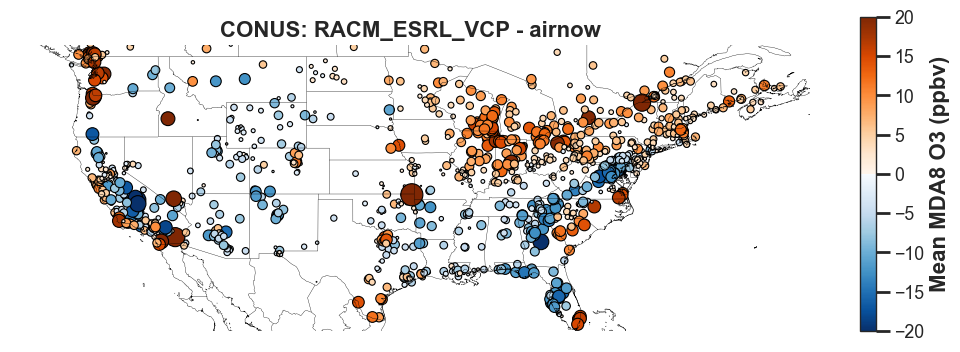

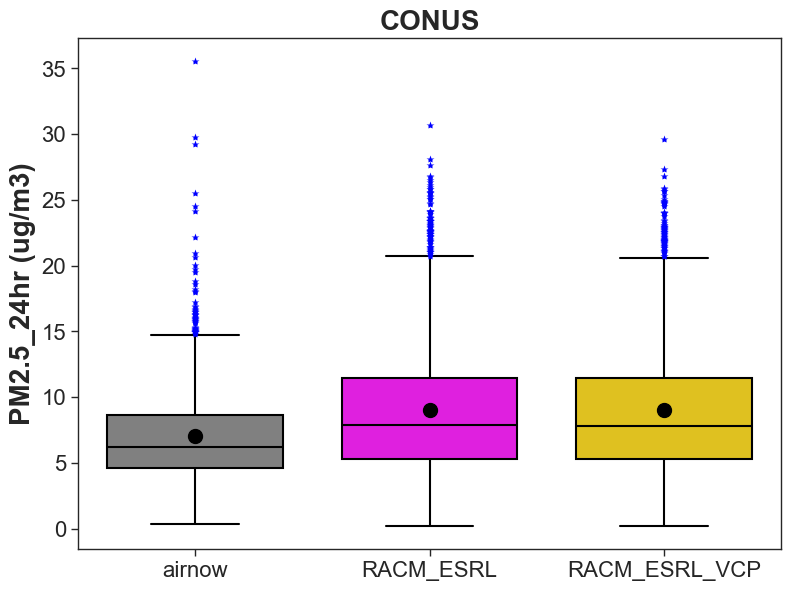

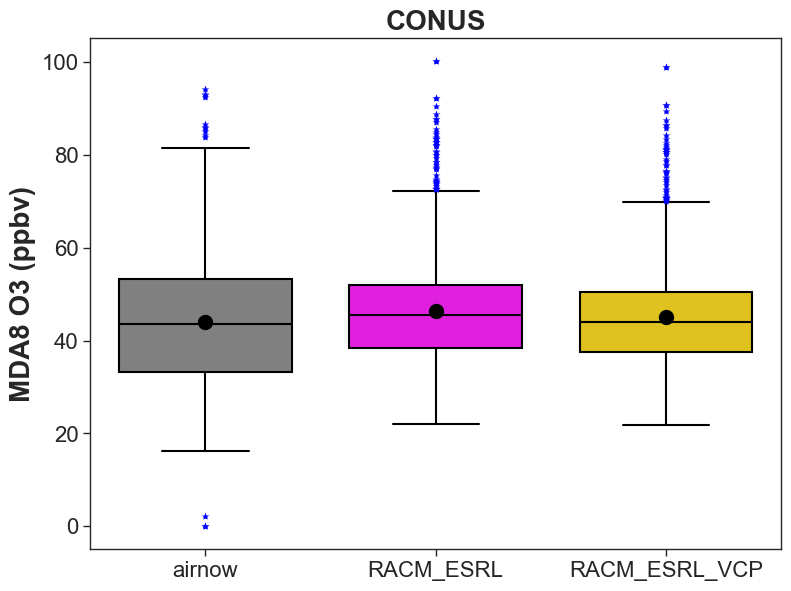

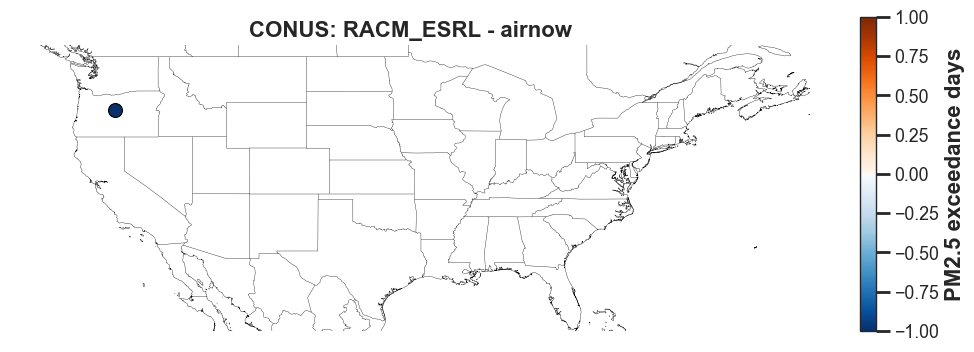

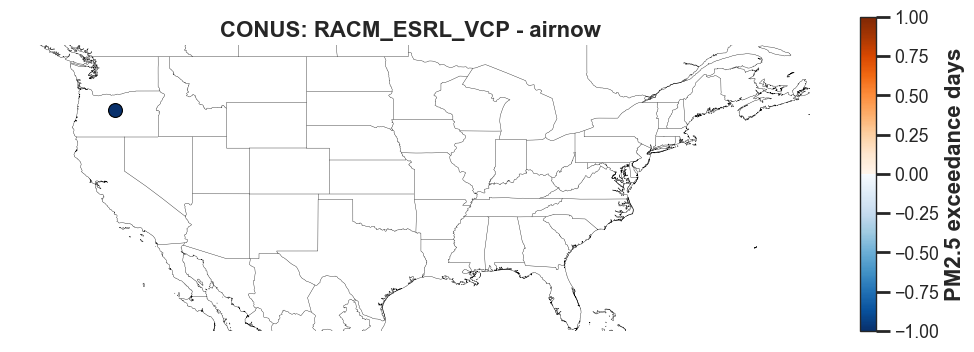

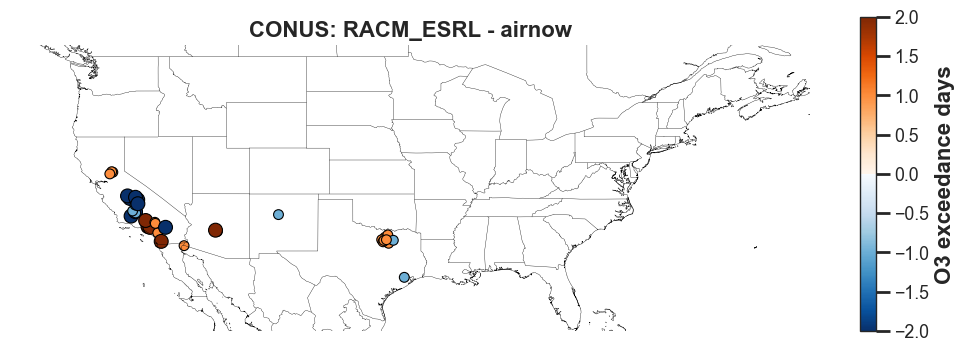

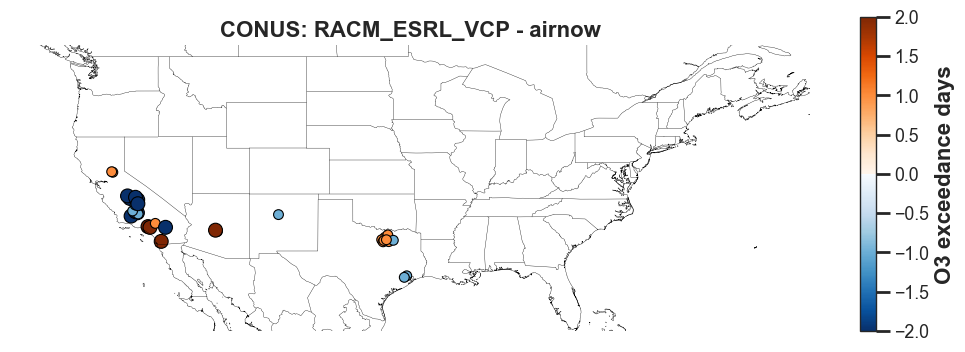

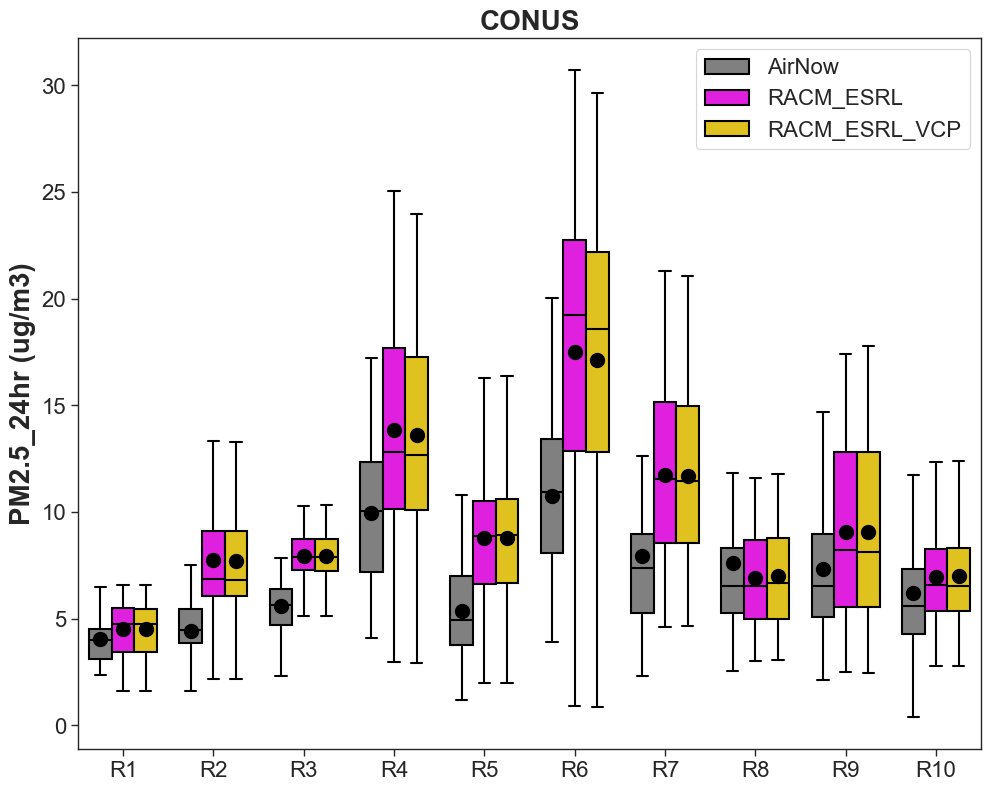

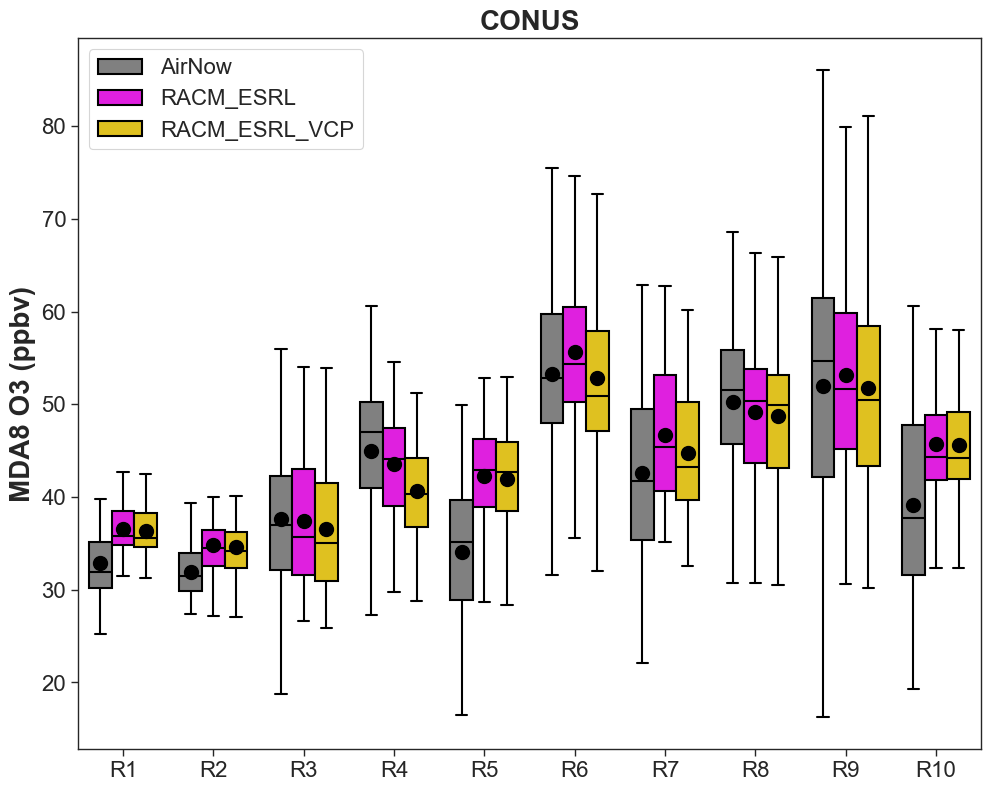

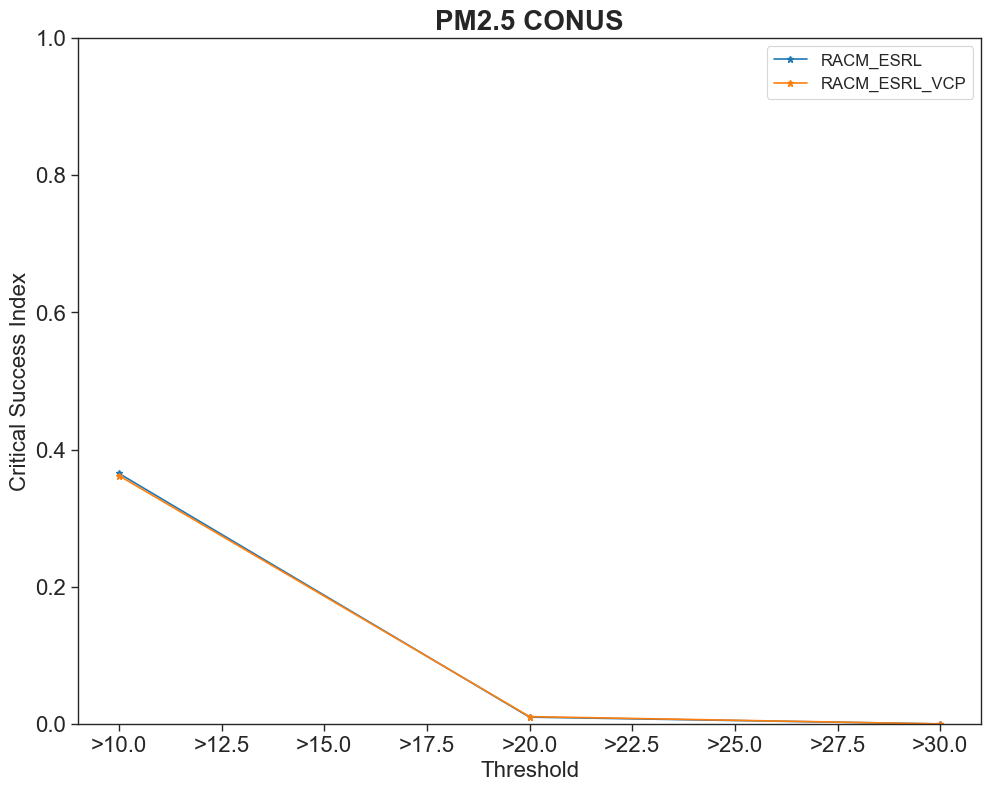

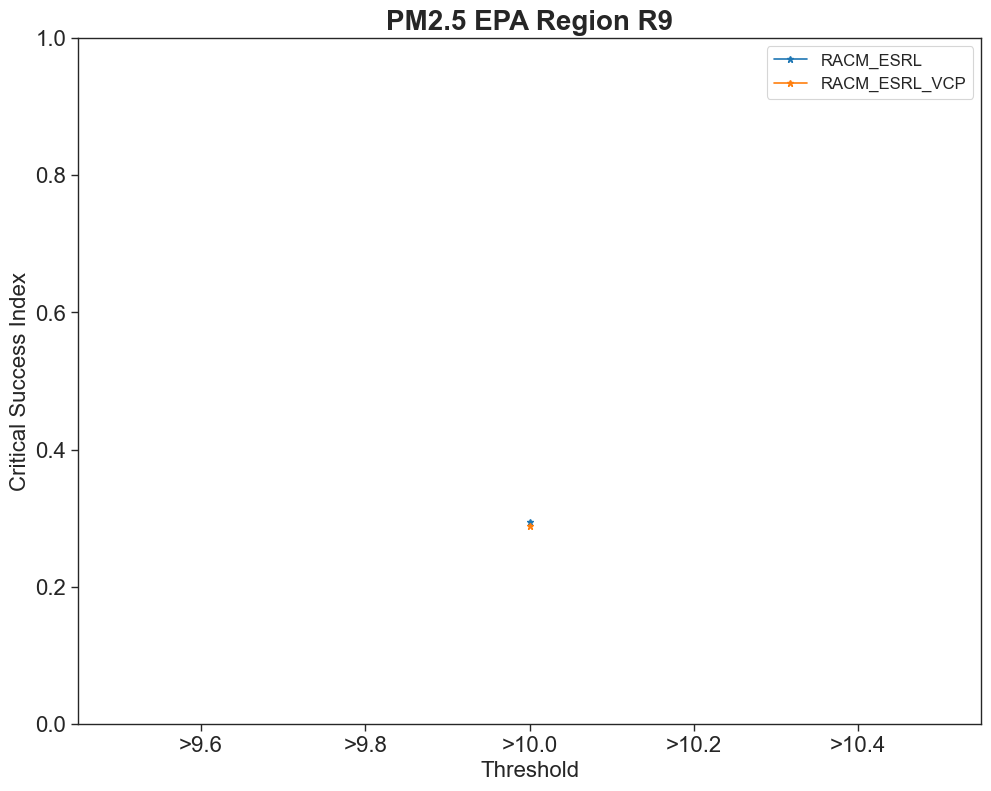

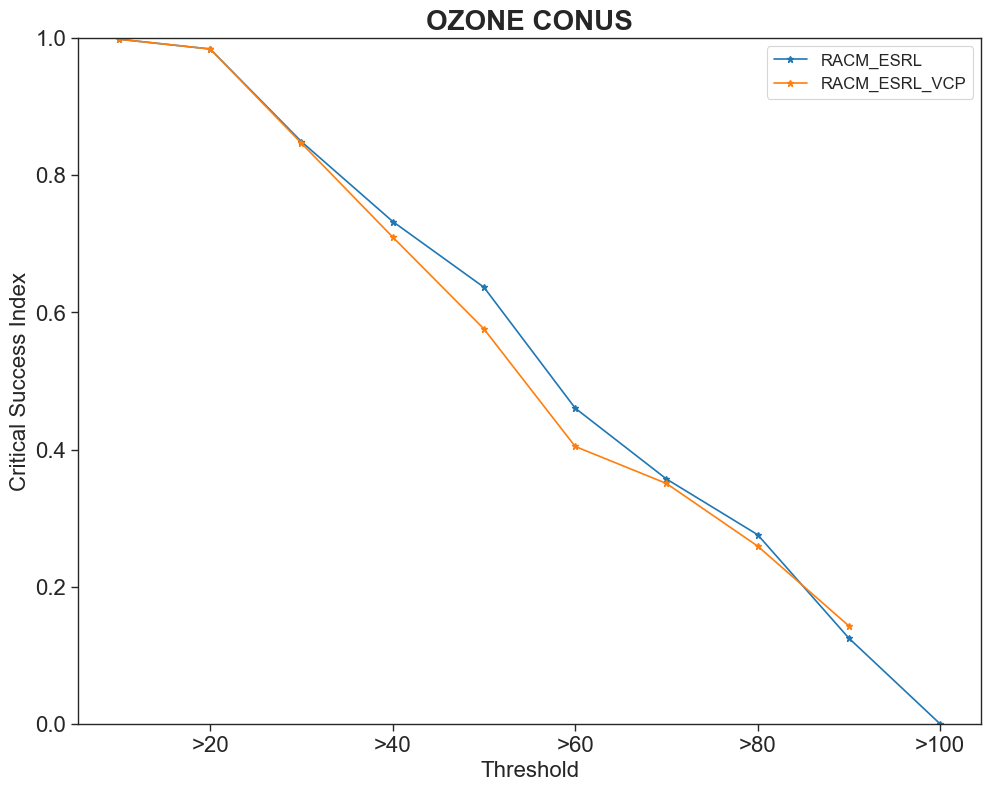

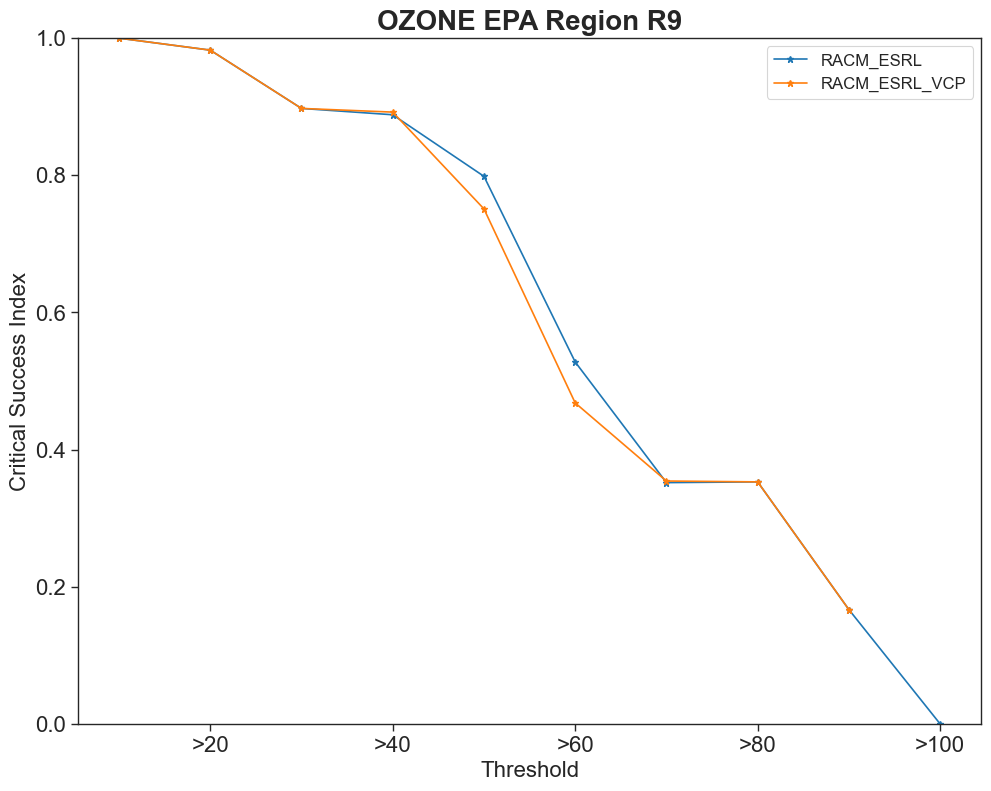

In [15]:
%%time

an.plotting()

The figures are saved in the directory specified by the
{class}`~melodies_monet.driver.analysis` instance's
{attr}`~melodies_monet.driver.analysis.output_dir`
attribute.

## Statistics

The {meth}`~melodies_monet.driver.analysis.stats` routine produces tables of statistics.

````{admonition} Note: Relevant control file section.
:class: dropdown

```{literalinclude} control_wrfchem_mech-0905_2.yaml
:caption:
:linenos:
:lines: 242-266
```
````

In [16]:
%%time

an.stats()

CPU times: user 1min 59s, sys: 27.2 s, total: 2min 27s
Wall time: 2min 31s


The stats routine has produced two files (one for each data variable).
This is one of them:
```{literalinclude} output/airnow_wrfchem_reg/stats.OZONE_reg.all.CONUS.2019-09-04_06.2019-09-06_05.csv
:caption:
```